Notebook created: 2018-04-03 03:48:34  
Generated from: _build_py/py/samuelson.rst  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def param_plot():

    """this function creates the graph on page 189 of Sargent Macroeconomic Theory, second edition, 1987"""

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_aspect('equal')

    # Set axis
    xmin, ymin = -3, -2
    xmax, ymax = -xmin, -ymin
    plt.axis([xmin, xmax, ymin, ymax])

    # Set axis labels
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(r'$\rho_2$', fontsize=16)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel(r'$\rho_1$', rotation=0, fontsize=16)
    ax.yaxis.set_label_position('right')

    # Draw (t1, t2) points
    ρ1 = np.linspace(-2, 2, 100)
    ax.plot(ρ1, -abs(ρ1) + 1, c='black')
    ax.plot(ρ1, np.ones_like(ρ1) * -1, c='black')
    ax.plot(ρ1, -(ρ1**2 / 4), c='black')

    # Turn normal axes off
    for spine in ['left', 'bottom', 'top', 'right']:
        ax.spines[spine].set_visible(False)

    # Add arrows to represent axes
    axes_arrows = {'arrowstyle': '<|-|>', 'lw': 1.3}
    ax.annotate('', xy=(xmin, 0), xytext=(xmax, 0), arrowprops=axes_arrows)
    ax.annotate('', xy=(0, ymin), xytext=(0, ymax), arrowprops=axes_arrows)

    # Annotate the plot with equations
    plot_arrowsl = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=-0.2"}
    plot_arrowsr = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=0.2"}
    ax.annotate(r'$\rho_1 + \rho_2 < 1$', xy=(0.5, 0.3), xytext=(0.8, 0.6),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_1 + \rho_2 = 1$', xy=(0.38, 0.6), xytext=(0.6, 0.8),
                arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_2 < 1 + \rho_1$', xy=(-0.5, 0.3), xytext=(-1.3, 0.6),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = 1 + \rho_1$', xy=(-0.38, 0.6), xytext=(-1, 0.8),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = -1$', xy=(1.5, -1), xytext=(1.8, -1.3),
                arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 = 0$', xy=(1.15, -0.35),
                xytext=(1.5, -0.3), arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 < 0$', xy=(1.4, -0.7),
                xytext=(1.8, -0.6), arrowprops=plot_arrowsr, fontsize='12')

    # Label categories of solutions
    ax.text(1.5, 1, 'Explosive\n growth', ha='center', fontsize=16)
    ax.text(-1.5, 1, 'Explosive\n oscillations', ha='center', fontsize=16)
    ax.text(0.05, -1.5, 'Explosive oscillations', ha='center', fontsize=16)
    ax.text(0.09, -0.5, 'Damped oscillations', ha='center', fontsize=16)

    # Add small marker to y-axis
    ax.axhline(y=1.005, xmin=0.495, xmax=0.505, c='black')
    ax.text(-0.12, -1.12, '-1', fontsize=10)
    ax.text(-0.12, 0.98, '1', fontsize=10)

    return fig

param_plot()
plt.show()

<Figure size 1200x800 with 1 Axes>

In [2]:
def categorize_solution(ρ1, ρ2):
    """this function takes values of ρ1 and ρ2 and uses them to classify the type of solution"""

    discriminant = ρ1 ** 2 + 4 * ρ2
    if ρ2 > 1 + ρ1 or ρ2 < -1:
        print('Explosive oscillations')
    elif ρ1 + ρ2 > 1:
        print('Explosive growth')
    elif discriminant < 0:
        print('Roots are complex with modulus less than one; therefore damped oscillations')
    else:
        print('Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state')

In [3]:
### Test the categorize_solution function

categorize_solution(1.3, -.4)

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state


```none
Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
```


In [4]:
def plot_y(function=None):
    """function plots path of Y_t"""
    plt.subplots(figsize=(12, 8))
    plt.plot(function)
    plt.xlabel('Time $t$')
    plt.ylabel('$Y_t$', rotation=0)
    plt.grid()
    plt.show()

ρ_1 is  1.42
ρ_2 is  -0.5
Two real roots: 
[-0.6459687576256715, -0.7740312423743284]
Absolute values of roots are less than one


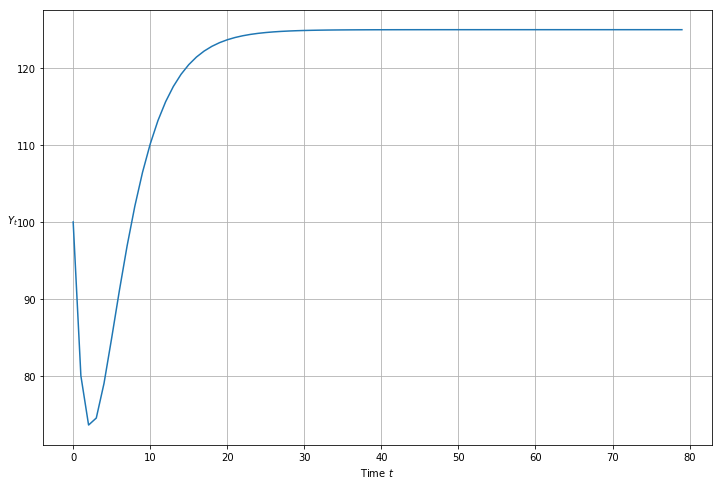

In [5]:
from cmath import sqrt

##=== This is a 'manual' method ===#

def y_nonstochastic(y_0=100, y_1=80, α=.92, β=.5, γ=10, n=80):

    """Takes values of parameters and computes roots of characteristic polynomial.
       It tells whether they are real or complex and whether they are less than unity in absolute value.
       It also computes a simulation of length n starting from the two given initial conditions for national income"""

    roots = []

    ρ1 = α + β
    ρ2 = -β

    print('ρ_1 is ', ρ1)
    print('ρ_2 is ', ρ2)

    discriminant = ρ1 ** 2 + 4 * ρ2

    if discriminant == 0:
        roots.append(-ρ1 / 2)
        print('Single real root: ')
        print(''.join(str(roots)))
    elif discriminant > 0:
        roots.append((-ρ1 + sqrt(discriminant).real) / 2)
        roots.append((-ρ1 - sqrt(discriminant).real) / 2)
        print('Two real roots: ')
        print(''.join(str(roots)))
    else:
        roots.append((-ρ1 + sqrt(discriminant)) / 2)
        roots.append((-ρ1 - sqrt(discriminant)) / 2)
        print('Two complex roots: ')
        print(''.join(str(roots)))

    if all(abs(root) < 1 for root in roots):
        print('Absolute values of roots are less than one')
    else:
        print('Absolute values of roots are not less than one')

    def transition(x, t): return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ

    y_t = [y_0, y_1]

    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_nonstochastic())

In [6]:
### code to reverse engineer a  cycle
### y_t = r^t (c_1 cos(ϕ t) + c2 sin(ϕ t))
###

import cmath
import math

def f(r, ϕ):
    """
    Takes modulus r and angle ϕ of complex number r exp(j ϕ)
    and creates ρ1 and ρ2 of characteristic polynomial for which
    r exp(j ϕ) and r exp(- j ϕ) are complex roots.

    Returns the multiplier coefficient a and the accelerator coefficient b
    that verifies those roots.
    """
    g1 = cmath.rect(r, ϕ)  # Generate two complex roots
    g2 = cmath.rect(r, -ϕ)
    ρ1 = g1 + g2           # Implied ρ1, ρ2
    ρ2 = -g1 * g2
    b = -ρ2                # Reverse engineer a and b that validate these
    a = ρ1 - b
    return ρ1, ρ2, a, b

## Now let's use the function in an example
## Here are the example paramters

r = .95
period = 10                # Length of cycle in units of time
ϕ = 2 * math.pi/period

## Apply the function

ρ1, ρ2, a, b = f(r, ϕ)

print("a, b = ", a, b)
print("ρ1, ρ2 =", ρ1, ρ2)

a, b =  (0.6346322893124001+0j) (0.9024999999999999-0j)
ρ1, ρ2 = (1.5371322893124+0j) (-0.9024999999999999+0j)


In [7]:
## Print the real components of ρ1 and ρ2

ρ1 = ρ1.real
ρ2 = ρ2.real

ρ1, ρ2

(1.5371322893124, -0.9024999999999999)

In [8]:
r1, r2 = np.roots([1, -ρ1, -ρ2])

p1 = cmath.polar(r1)
p2 = cmath.polar(r2)

print("r, ϕ =", r, ϕ)
print("p1, p2 = ", p1, p2)
# print("g1, g2 = ", g1, g2)

print("a, b =", a, b)
print("ρ1, ρ2 =", ρ1, ρ2)

r, ϕ = 0.95 0.6283185307179586
p1, p2 =  (0.95, 0.6283185307179586) (0.95, -0.6283185307179586)
a, b = (0.6346322893124001+0j) (0.9024999999999999-0j)
ρ1, ρ2 = 1.5371322893124 -0.9024999999999999


Roots are complex with modulus less than one; therefore damped oscillations
Roots are [0.85+0.27838822j 0.85-0.27838822j]
Roots are complex
Roots are less than one


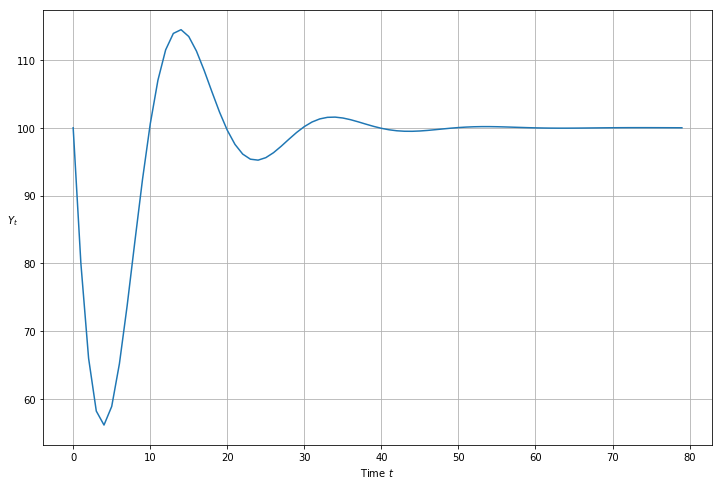

In [9]:
##=== This method uses numpy to calculate roots ===#


def y_nonstochastic(y_0=100, y_1=80, α=.9, β=.8, γ=10, n=80):

    """ Rather than computing the roots of the characteristic polynomial by hand as we did earlier, this function
    enlists numpy to do the work for us """

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print('Roots are', roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Define transition equation
    def transition(x, t): return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ

    # Set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_nonstochastic())

a, b = 0.6180339887498949 1.0
Roots are complex with modulus less than one; therefore damped oscillations
Roots are [0.80901699+0.58778525j 0.80901699-0.58778525j]
Roots are complex
Roots are less than one


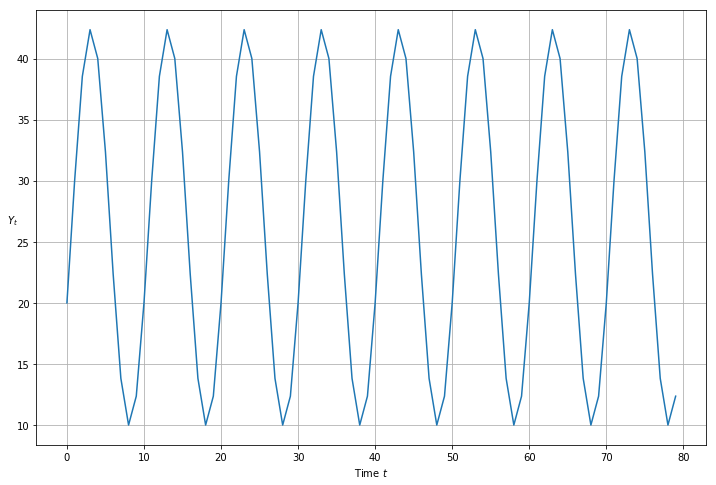

In [10]:
r = 1   # generates undamped, nonexplosive cycles

period = 10   #  length of cycle in units of time
ϕ = 2 * math.pi/period

## Apply the reverse engineering function f

ρ1, ρ2, a, b = f(r, ϕ)

a = a.real  # drop the imaginary part so that it is a valid input into y_nonstochastic
b = b.real

print("a, b =", a, b)

ytemp = y_nonstochastic(α=a, β=b, y_0=20, y_1=30)
plot_y(ytemp)

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


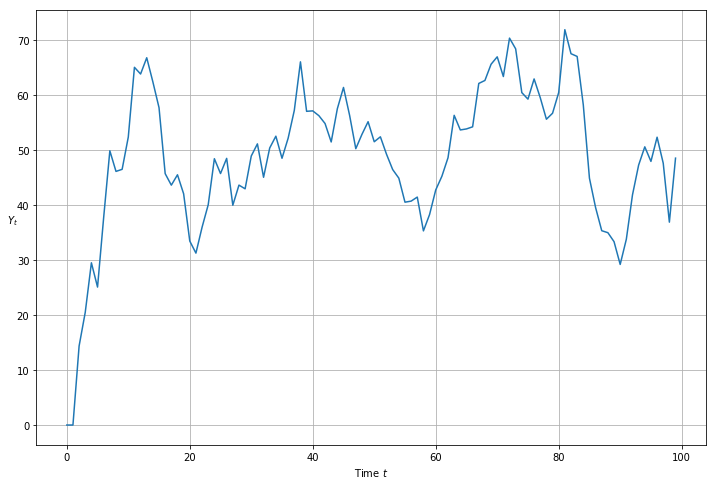

In [10]:
def y_stochastic(y_0=0, y_1=0, α=0.8, β=0.2, γ=10, n=100, σ=5):

    """This function takes parameters of a stochastic version of the model and proceeds to analyze
    the roots of the characteristic polynomial and also generate a simulation"""

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    # Categorize solution
    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    ϵ = np.random.normal(0, 1, n)

    # Define transition equation
    def transition(x, t): return ρ1 * \
        x[t - 1] + ρ2 * x[t - 2] + γ + σ * ϵ[t]

    # Set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))

    return y_t

plot_y(y_stochastic())

a, b =  0.6285929690873979 0.9409000000000001
Roots are complex with modulus less than one; therefore damped oscillations
[0.78474648+0.57015169j 0.78474648-0.57015169j]
Roots are complex
Roots are less than one


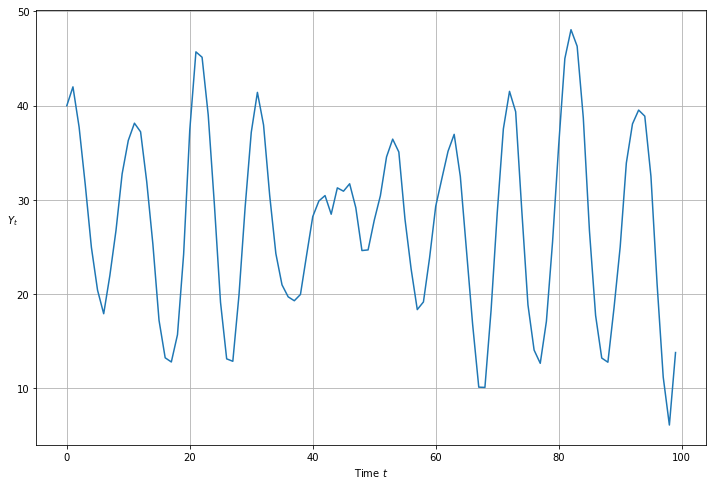

In [11]:
r = .97

period = 10   #  length of cycle in units of time
ϕ = 2 * math.pi/period

### apply the  reverse engineering function f

ρ1, ρ2, a, b = f(r, ϕ)

a = a.real  # drop the imaginary part so that it is a valid input into y_nonstochastic
b = b.real

print("a, b = ", a, b)
plot_y(y_stochastic(y_0=40, y_1 = 42, α=a, β=b, σ=2, n=100))

In [12]:
def y_stochastic_g(y_0=20,
                   y_1=20,
                   α=0.8,
                   β=0.2,
                   γ=10,
                   n=100,
                   σ=2,
                   g=0,
                   g_t=0,
                   duration='permanent'):

    """This program computes a response to a permanent increase in government expenditures that occurs
       at time 20"""

    # Useful constants
    ρ1 = α + β
    ρ2 = -β

    # Categorize solution
    categorize_solution(ρ1, ρ2)

    # Find roots of polynomial
    roots = np.roots([1, -ρ1, -ρ2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    ϵ = np.random.normal(0, 1, n)

    def transition(x, t, g):

        # Non-stochastic - separated to avoid generating random series when not needed
        if σ == 0:
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g

        # Stochastic
        else:
            ϵ = np.random.normal(0, 1, n)
            return ρ1 * x[t - 1] + ρ2 * x[t - 2] + γ + g + σ * ϵ[t]

    # Create list and set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):

        # No government spending
        if g == 0:
            y_t.append(transition(y_t, t))

        # Government spending (no shock)
        elif g != 0 and duration == None:
            y_t.append(transition(y_t, t))

        # Permanent government spending shock
        elif duration == 'permanent':
            if t < g_t:
                y_t.append(transition(y_t, t, g=0))
            else:
                y_t.append(transition(y_t, t, g=g))

        # One-off government spending shock
        elif duration == 'one-off':
            if t == g_t:
                y_t.append(transition(y_t, t, g=g))
            else:
                y_t.append(transition(y_t, t, g=0))
    return y_t

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


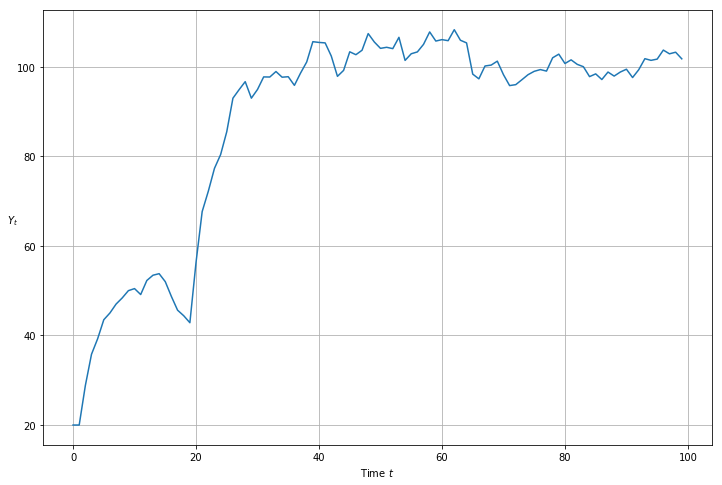

In [13]:
plot_y(y_stochastic_g(g=10, g_t=20, duration='permanent'))

Roots are real and absolute values are less than zero; therefore get smooth convergence to a steady state
[0.7236068 0.2763932]
Roots are real
Roots are less than one


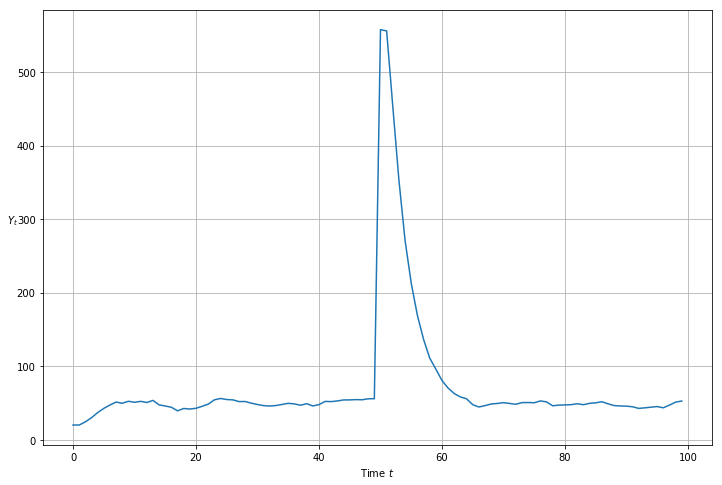

In [14]:
plot_y(y_stochastic_g(g=500, g_t=50, duration='one-off'))

In [15]:
class Samuelson():

    r"""This class represents the Samuelson model, otherwise known as the
    multiple-accelerator model. The model combines the Keynesian multipler
    with the accelerator theory of investment.

    The path of output is governed by a linear second-order difference equation

    .. math::

        Y_t =  + \alpha (1 + \beta) Y_{t-1} - \alpha \beta Y_{t-2}

    Parameters
    ----------
    y_0 : scalar
        Initial condition for Y_0
    y_1 : scalar
        Initial condition for Y_1
    α : scalar
        Marginal propensity to consume
    β : scalar
        Accelerator coefficient
    n : int
        Number of iterations
    σ : scalar
        Volatility parameter. Must be greater than or equal to 0. Set
        equal to 0 for non-stochastic model.
    g : scalar
        Government spending shock
    g_t : int
        Time at which government spending shock occurs. Must be specified
        when duration != None.
    duration : {None, 'permanent', 'one-off'}
        Specifies type of government spending shock. If none, government
        spending equal to g for all t.

    """

    def __init__(self,
                 y_0=100,
                 y_1=50,
                 α=1.3,
                 β=0.2,
                 γ=10,
                 n=100,
                 σ=0,
                 g=0,
                 g_t=0,
                 duration=None):

        self.y_0, self.y_1, self.α, self.β = y_0, y_1, α, β
        self.n, self.g, self.g_t, self.duration = n, g, g_t, duration
        self.γ, self.σ = γ, σ
        self.ρ1 = α + β
        self.ρ2 = -β
        self.roots = np.roots([1, -self.ρ1, -self.ρ2])

    def root_type(self):
        if all(isinstance(root, complex) for root in self.roots):
            return 'Complex conjugate'
        elif len(self.roots) > 1:
            return 'Double real'
        else:
            return 'Single real'

    def root_less_than_one(self):
        if all(abs(root) < 1 for root in self.roots):
            return True

    def solution_type(self):
        ρ1, ρ2 = self.ρ1, self.ρ2
        discriminant = ρ1 ** 2 + 4 * ρ2
        if ρ2 >= 1 + ρ1 or ρ2 <= -1:
            return 'Explosive oscillations'
        elif ρ1 + ρ2 >= 1:
            return 'Explosive growth'
        elif discriminant < 0:
            return 'Damped oscillations'
        else:
            return 'Steady state'

    def _transition(self, x, t, g):

        # Non-stochastic - separated to avoid generating random series when not needed
        if self.σ == 0:
            return self.ρ1 * x[t - 1] + self.ρ2 * x[t - 2] + self.γ + g

        # Stochastic
        else:
            ϵ = np.random.normal(0, 1, self.n)
            return self.ρ1 * x[t - 1] + self.ρ2 * x[t - 2] + self.γ + g + self.σ * ϵ[t]

    def generate_series(self):

        # Create list and set initial conditions
        y_t = [self.y_0, self.y_1]

        # Generate y_t series
        for t in range(2, self.n):

            # No government spending
            if self.g == 0:
                y_t.append(self._transition(y_t, t))

            # Government spending (no shock)
            elif self.g != 0 and self.duration == None:
                y_t.append(self._transition(y_t, t))

            # Permanent government spending shock
            elif self.duration == 'permanent':
                if t < self.g_t:
                    y_t.append(self._transition(y_t, t, g=0))
                else:
                    y_t.append(self._transition(y_t, t, g=self.g))

            # One-off government spending shock
            elif self.duration == 'one-off':
                if t == self.g_t:
                    y_t.append(self._transition(y_t, t, g=self.g))
                else:
                    y_t.append(self._transition(y_t, t, g=0))
        return y_t

    def summary(self):
        print('Summary\n' + '-' * 50)
        print('Root type: ' + self.root_type())
        print('Solution type: ' + self.solution_type())
        print('Roots: ' + str(self.roots))

        if self.root_less_than_one() == True:
            print('Absolute value of roots is less than one')
        else:
            print('Absolute value of roots is not less than one')

        if self.σ > 0:
            print('Stochastic series with σ = ' + str(self.σ))
        else:
            print('Non-stochastic series')

        if self.g != 0:
            print('Government spending equal to ' + str(self.g))

        if self.duration != None:
            print(self.duration.capitalize() +
                  ' government spending shock at t = ' + str(self.g_t))

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(self.generate_series())
        ax.set(xlabel='Iteration', xlim=(0, self.n))
        ax.set_ylabel('$Y_t$', rotation=0)
        ax.grid()

        # Add parameter values to plot
        paramstr = '$\\alpha=%.2f$\n$\\beta=%.2f$\n$\\gamma=%.2f$\n$\\sigma=%.2f$\n$\\rho_1=%.2f$\n$\\rho_2=%.2f$'%(
                    self.α, self.β, self.γ, self.σ, self.ρ1, self.ρ2)
        props = dict(fc='white', pad=10, alpha=0.5)
        ax.text(0.87, 0.05, paramstr, transform=ax.transAxes,
                fontsize=12, bbox=props, va='bottom')

        return fig

    def param_plot(self):

        # Uses the param_plot() function defined earlier (it is then able
        # to be used standalone or as part of the model)

        fig = param_plot()
        ax = fig.gca()

        # Add lambda values to legend
        for i, root in enumerate(self.roots):
            if isinstance(root, complex):
                operator = ['+', ''] # Need to fill operator for positive as string is split apart
                label = r'$\lambda_{0} = {1.real:.2f} {2} {1.imag:.2f}i$'.format(i+1, sam.roots[i], operator[i])
            else:
                label = r'$\lambda_{0} = {1.real:.2f}$'.format(i+1, sam.roots[i])
            ax.scatter(0, 0, 0, label=label) # dummy to add to legend

        # Add ρ pair to plot
        ax.scatter(self.ρ1, self.ρ2, 100, 'red', '+', label=r'$(\ \rho_1, \ \rho_2 \ )$', zorder=5)

        plt.legend(fontsize=12, loc=3)

        return fig

In [16]:
sam = Samuelson(α=0.8, β=0.5, σ=2, g=10, g_t=20, duration='permanent')
sam.summary()

Summary
--------------------------------------------------
Root type: Complex conjugate
Solution type: Damped oscillations
Roots: [0.65+0.27838822j 0.65-0.27838822j]
Absolute value of roots is less than one
Stochastic series with σ = 2
Government spending equal to 10
Permanent government spending shock at t = 20


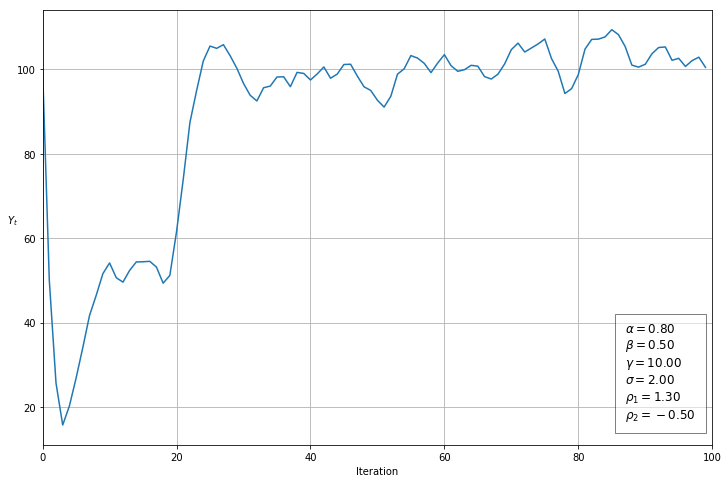

In [17]:
sam.plot()
plt.show()

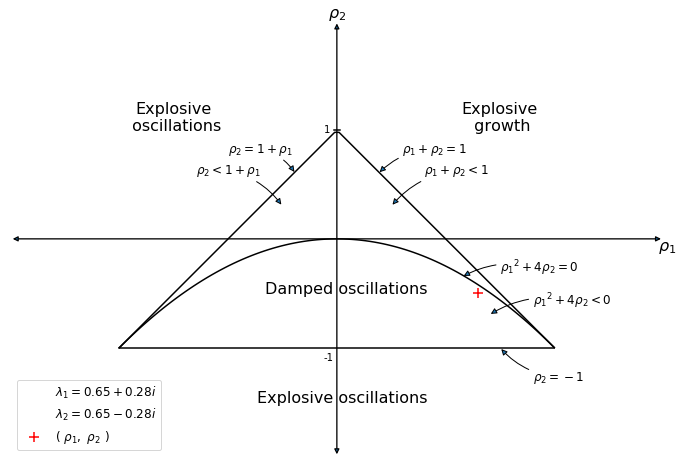

In [18]:
sam.param_plot()
plt.show()

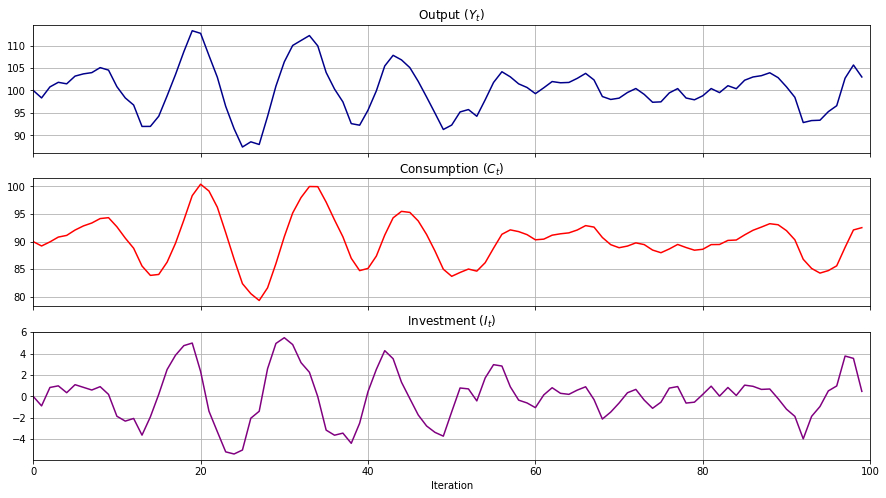

In [19]:
from quantecon import LinearStateSpace

""" This script maps the Samuelson model in the the LinearStateSpace class"""
α = 0.8
β = 0.9
ρ1 = α + β
ρ2 = -β
γ = 10
σ = 1
g = 10
n = 100

A = [[1,        0,      0],
     [γ + g,   ρ1,     ρ2],
     [0,        1,      0]]

G = [[γ + g, ρ1,   ρ2],         # this is Y_{t+1}
     [γ,      α,    0],         # this is C_{t+1}
     [0,      β,   -β]]         # this is I_{t+1}

μ_0 = [1, 100, 100]
C = np.zeros((3,1))
C[1] = σ # stochastic

sam_t = LinearStateSpace(A, C, G, mu_0=μ_0)

x, y = sam_t.simulate(ts_length=n)

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
colors = ['darkblue', 'red', 'purple']
for ax, series, title, color in zip(axes, y, titles, colors):
    ax.plot(series, color=color)
    ax.set(title=title, xlim=(0, n))
    ax.grid()

axes[-1].set_xlabel('Iteration')

plt.show()

In [20]:
imres = sam_t.impulse_response()
imres = np.asarray(imres)
y1 = imres[:, :, 0]
y2 = imres[:, :, 1]
y1.shape

(2, 6, 1)

In [21]:
A = np.asarray(A)
w, v = np.linalg.eig(A)
print(w)

[0.85+0.42130749j 0.85-0.42130749j 1.  +0.j        ]


In [22]:
class SamuelsonLSS(LinearStateSpace):

    """
    this subclass creates a Samuelson multiplier-accelerator model
    as a linear state space system
    """
    def __init__(self,
                 y_0=100,
                 y_1=100,
                 α=0.8,
                 β=0.9,
                 γ=10,
                 σ=1,
                 g=10):

        self.α, self.β = α, β
        self.y_0, self.y_1, self.g = y_0, y_1, g
        self.γ, self.σ = γ, σ

        # Define intial conditions
        self.μ_0 = [1, y_0, y_1]

        self.ρ1 = α + β
        self.ρ2 = -β

        # Define transition matrix
        self.A = [[1,                 0,         0],
                  [γ + g,       self.ρ1,   self.ρ2],
                  [0,                 1,         0]]

        # Define output matrix
        self.G = [[γ + g, self.ρ1, self.ρ2],         # this is Y_{t+1}
                  [γ,           α,       0],         # this is C_{t+1}
                  [0,           β,      -β]]         # this is I_{t+1}

        self.C = np.zeros((3, 1))
        self.C[1] = σ  # stochastic

        # Initialize LSS with parameters from Samuleson model
        LinearStateSpace.__init__(self, self.A, self.C, self.G, mu_0=self.μ_0)

    def plot_simulation(self, ts_length=100, stationary=True):

        # Temporarily store original parameters
        temp_μ = self.μ_0
        temp_Σ = self.Sigma_0

        # Set distribution parameters equal to their stationary values for simulation
        if stationary == True:
            try:
                self.μ_x, self.μ_y, self.σ_x, self.σ_y = self.stationary_distributions()
                self.μ_0 = self.μ_y
                self.Σ_0 = self.σ_y
            # Exception where no convergence achieved when calculating stationary distributions
            except ValueError:
                print('Stationary distribution does not exist')

        x, y = self.simulate(ts_length)

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, title, color in zip(axes, y, titles, colors):
            ax.plot(series, color=color)
            ax.set(title=title, xlim=(0, n))
            ax.grid()

        axes[-1].set_xlabel('Iteration')

        # Reset distribution parameters to their initial values
        self.μ_0 = temp_μ
        self.Sigma_0 = temp_Σ

        return fig

    def plot_irf(self, j=5):

        x, y = self.impulse_response(j)

        # Reshape into 3 x j matrix for plotting purposes
        yimf = np.array(y).flatten().reshape(j+1, 3).T

        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        labels = ['$Y_t$', '$C_t$', '$I_t$']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, label, color in zip(axes, yimf, labels, colors):
            ax.plot(series, color=color)
            ax.set(xlim=(0, j))
            ax.set_ylabel(label, rotation=0, fontsize=14, labelpad=10)
            ax.grid()

        axes[0].set_title('Impulse Response Functions')
        axes[-1].set_xlabel('Iteration')

        return fig

    def multipliers(self, j=5):
        x, y = self.impulse_response(j)
        return np.sum(np.array(y).flatten().reshape(j+1, 3), axis=0)

In [23]:
samlss = SamuelsonLSS()

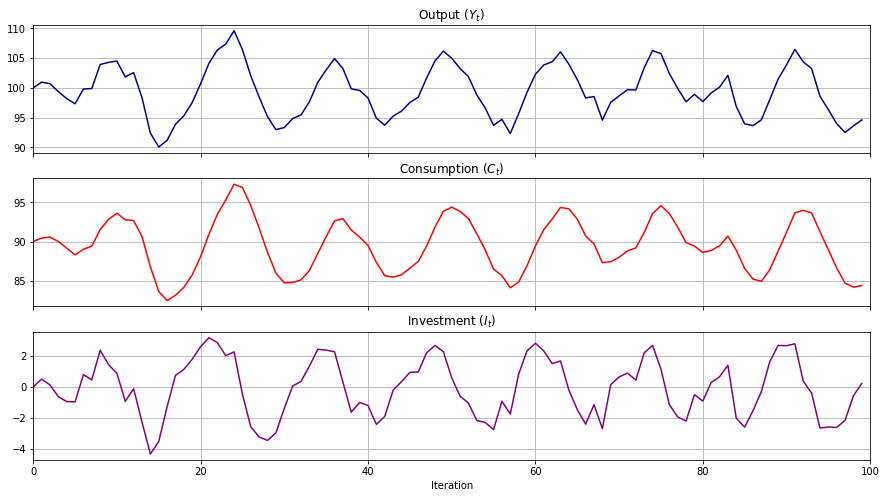

In [24]:
samlss.plot_simulation(100, stationary=False)
plt.show()

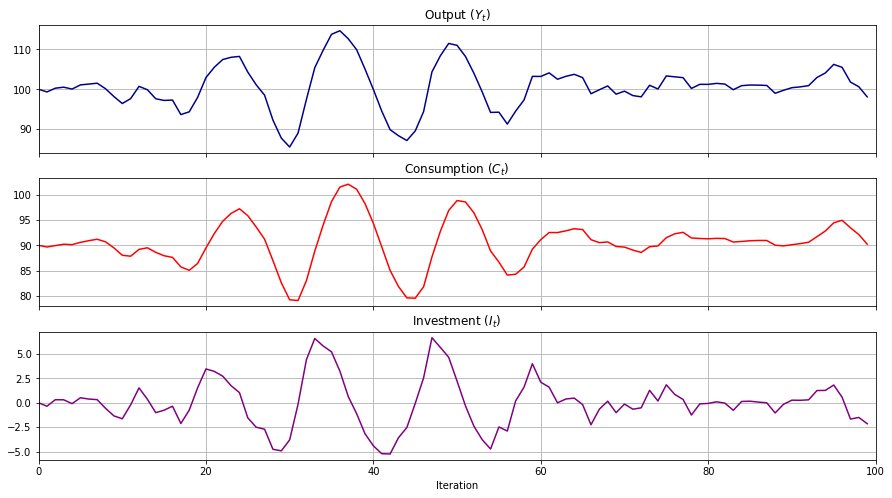

In [25]:
samlss.plot_simulation(100, stationary=True)
plt.show()

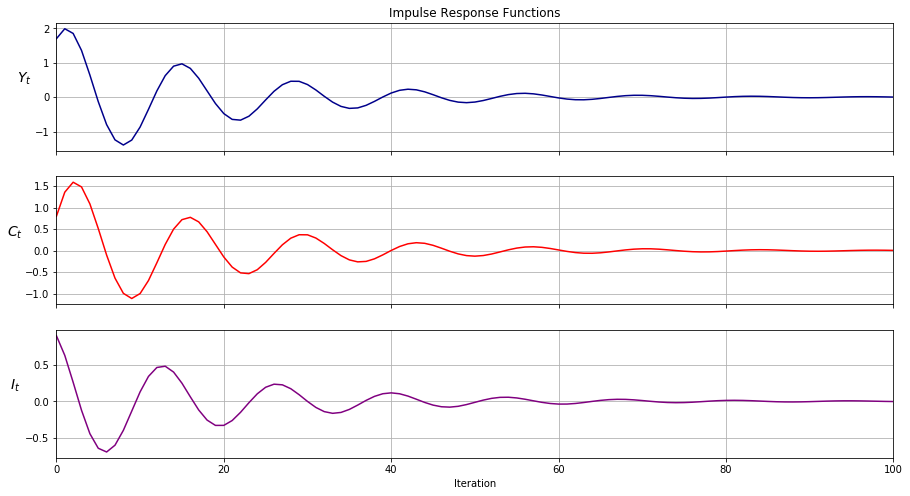

In [26]:
samlss.plot_irf(100)
plt.show()

In [27]:
samlss.multipliers()

array([7.414389, 6.835896, 0.578493])

In [28]:
pure_multiplier = SamuelsonLSS(α=0.95, β=0)

Stationary distribution does not exist


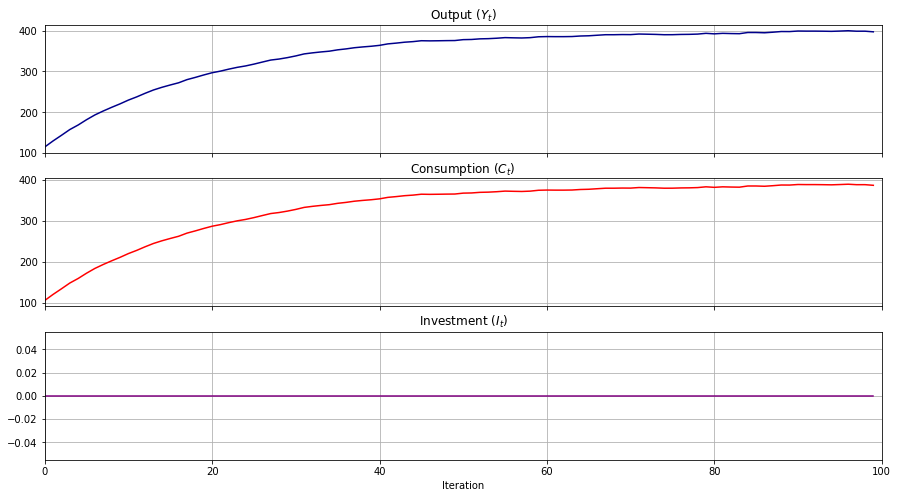

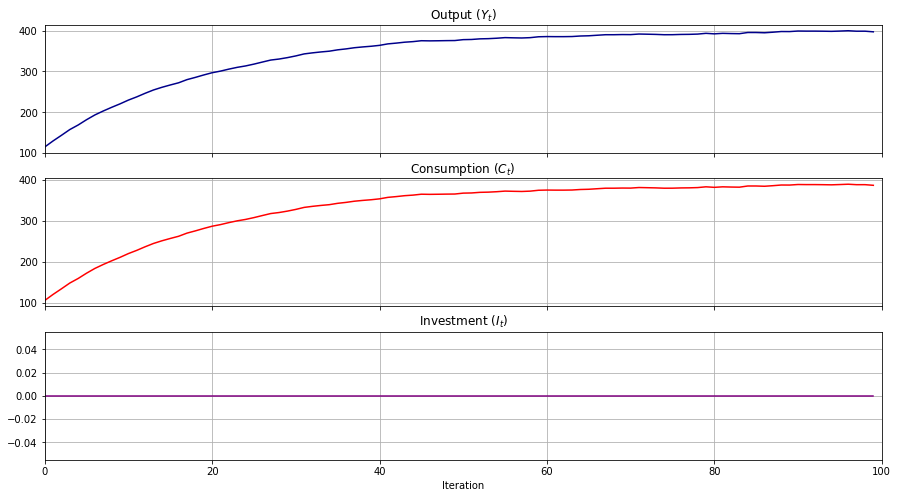

In [29]:
pure_multiplier.plot_simulation()

In [30]:
pure_multiplier = SamuelsonLSS(α=0.8, β=0)

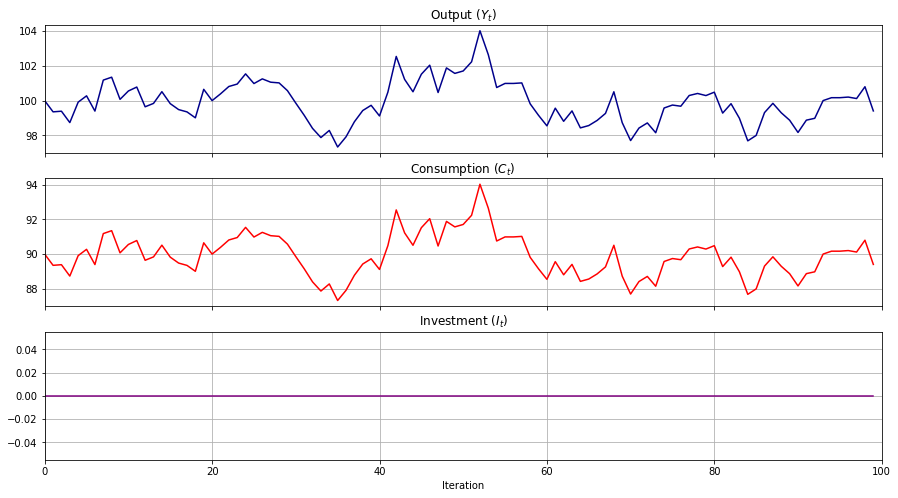

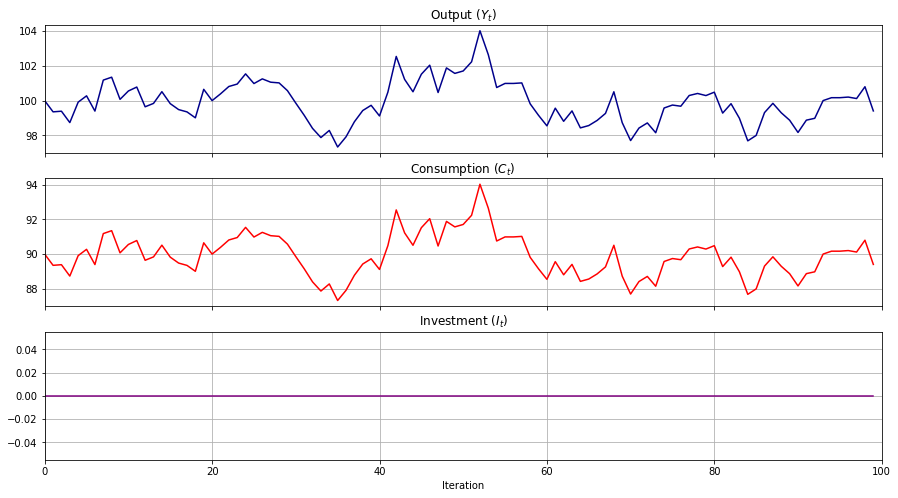

In [31]:
pure_multiplier.plot_simulation()

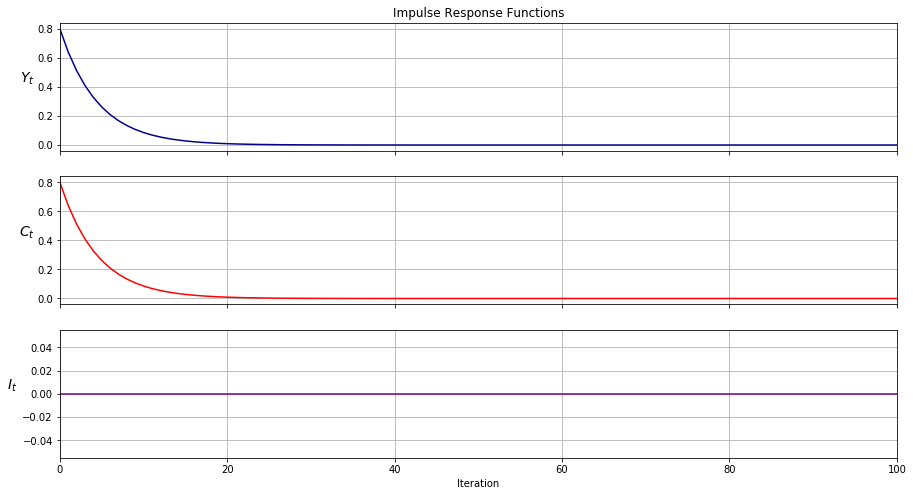

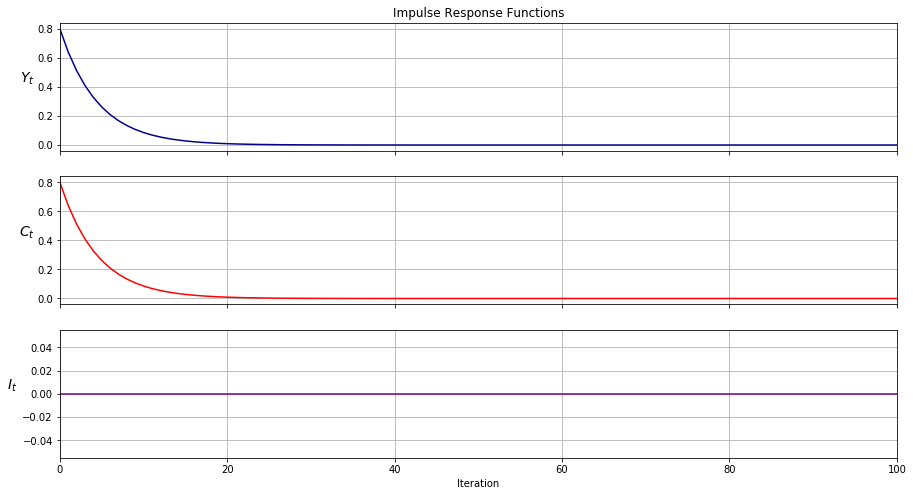

In [32]:
pure_multiplier.plot_irf(100)